# Analisis Data Ride Sharing Zuber


# Pendahuluan

Tujuan dari analisis ini untuk menemukan pola pada informasi yang tersedia untuk memahami preferensi penumpang dan dampak faktor eksternal terhadap perjalanan. Kita akan mempelajari basis data, menganalisis data dari kompetitor, dan menguji hipotesis tentang pengaruh cuaca terhadap frekuensi perjalanan.

# Ikthisar Data

In [1]:
#memuat semua library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#memuat data
trip_company = pd.read_csv('/datasets/project_sql_result_01.csv')
trip_end = pd.read_csv('/datasets/project_sql_result_04.csv')
trip_loop = pd.read_csv('/datasets/project_sql_result_07.csv')


In [3]:
#memeriksa sample data
trip_company.sample(5)

,company_name,trips_amount
42,1085 - 72312 N and W Cab Co,29
27,Service Taxi Association,402
22,Chicago Independents,1296
33,Metro Jet Taxi A,146
58,5062 - 34841 Sam Mestas,8


In [4]:
trip_end.sample(5)

,dropoff_location_name,average_trips
59,Chatham,23.200000
14,Near South Side,839.833333
45,Boystown,53.966667
86,West Elsdon,5.666667
8,Gold Coast,1364.233333


In [5]:
trip_loop.sample(5)

,start_ts,weather_conditions,duration_seconds
243,2017-11-11 05:00:00,Good,1320.0
536,2017-11-11 12:00:00,Good,2122.0
1033,2017-11-11 05:00:00,Good,1260.0
661,2017-11-11 10:00:00,Good,1465.0
990,2017-11-11 06:00:00,Good,1670.0


In [6]:
#memeriksa tipe data
trip_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
trip_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
trip_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


Kolom `start_ts` terlihat memiliki tipe data object. Kita akan merubahnya dalam format datetime untuk memudahkan analisis data.

In [9]:
#mengubah tipe data kolom start_ts menjadi datetime
trip_loop['start_ts'] = pd.to_datetime(trip_loop['start_ts'], format='%Y-%m-%d %H:%M:%S')
trip_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


# Eksplorasi Data Analisis

## Menganalisis 10 wilayah teratas yang titik pengantaran

In [10]:
#memeriksa 10 wilayah teratas yang dijadikan sebagai titik pengantaran
top_dropoff = trip_end.pivot_table(index='dropoff_location_name', values='average_trips', aggfunc='mean').sort_values(by='average_trips', ascending=False).head(10)
top_dropoff
top_dropoff['dropoff_location_name'] = top_dropoff.index
top_dropoff

,average_trips,dropoff_location_name
dropoff_location_name,,
Loop,10727.466667,Loop
River North,9523.666667,River North
Streeterville,6664.666667,Streeterville
West Loop,5163.666667,West Loop
O'Hare,2546.900000,O'Hare
Lake View,2420.966667,Lake View
Grant Park,2068.533333,Grant Park
Museum Campus,1510.000000,Museum Campus
Gold Coast,1364.233333,Gold Coast


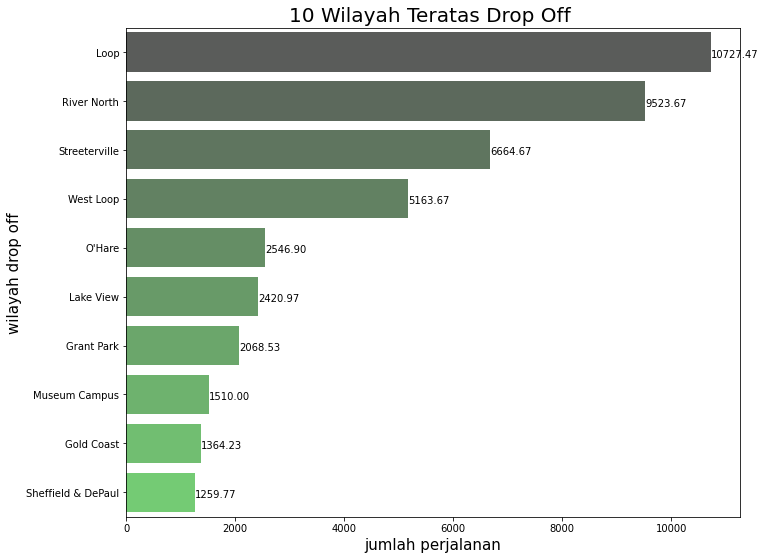

In [11]:
fig, ax = plt.subplots(figsize=(11, 9))
splot = sns.barplot(data=top_dropoff, x='average_trips', y='dropoff_location_name', palette="dark:limegreen", alpha=0.75)

for p in splot.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
    
ax.set_xlabel('jumlah perjalanan',fontdict={'size': 15})
ax.set_ylabel('wilayah drop off',fontdict={'size': 15})
plt.title('10 Wilayah Teratas Drop Off ',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()

Dari hasil bar plot 10 Wilayah Teratas Drop Off, diketahui bahwa:

* Terdapat 10 lokasi yang sering menjadi titik drop off para penumpang yaitu Loop,River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul

## Menganalisis 10 perusahaan terpopuler

In [12]:
#total perjalanan per perusahaan
trip_company.pivot_table(index='company_name', values='trips_amount', aggfunc='sum').sort_values(by='trips_amount', ascending=False)

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
...,...
4053 - 40193 Adwar H. Nikola,7
2733 - 74600 Benny Jona,7
5874 - 73628 Sergey Cab Corp.,5


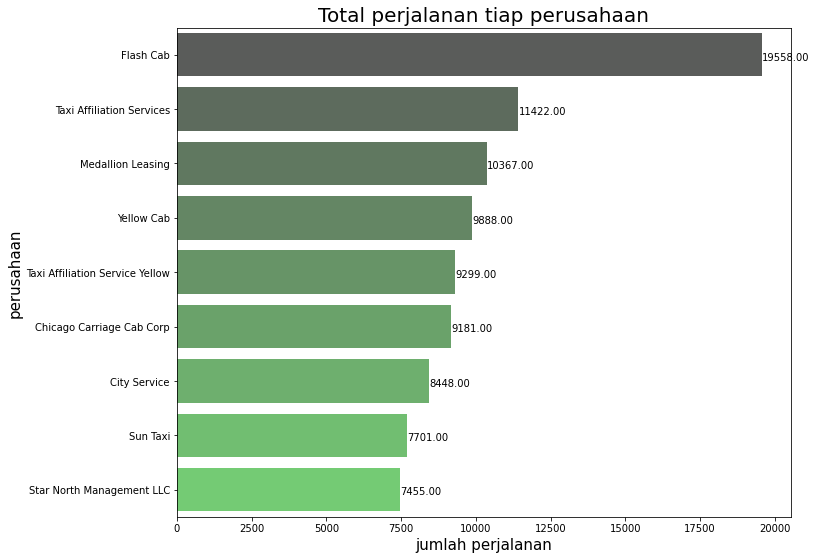

In [13]:
#memvisualisasikan 20 data total perjalanan berdasarkan perusahaan

fig, ax = plt.subplots(figsize=(11, 9))
splot = sns.barplot(data=trip_company[0:9], x='trips_amount', y='company_name', palette="dark:limegreen", alpha=0.75)

for p in splot.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
    
ax.set_xlabel('jumlah perjalanan',fontdict={'size': 15})
ax.set_ylabel('perusahaan',fontdict={'size': 15})
plt.title('Total perjalanan tiap perusahaan',fontdict={'size': 20})
plt.xticks(rotation = 0) 
plt.show()

Dari hasil pivot tabel dan bar plot Total perjalanan tiap perusahaan, diketahui bahwa:

* **Flash cab** merupakan perusahaan taksi dengan jumlah perjalanan **terbanyak** yaitu 19558 dan perusahaan yang **kurang diminati** yaitu **3556 - 36214 RC Andrews Cab** yang hanya memiliki 2 perjalanan	
* Selisih jumlah perjalanan perusahaan **Flash Cab** dengan perusahaan-perusahaan di bawahnya relatif cukup jauh 

# Analisa Data Statistik

## Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan

In [14]:
#mengiris data cuaca hujan dan cerah
good_weather = trip_loop.query('weather_conditions == "Good"')
good_weather

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


In [15]:
bad_weather = trip_loop.query('weather_conditions == "Bad"')
bad_weather

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


Sebelum melakukan uji hipotesis, kita akan menguji apakah varians antara kedua sampel sama atau tidak dengan menggunakan uji levene

In [16]:
#uji levene

st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'])

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

Dikarenakan p-value nya > dari nilai alpha yang akan digunakan (0.05) maka varians antara kedua sample akan dianggap sama

**H0** =  Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare pada hari-hari Sabtu yang hujan adalah **sama**

**H1** = Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare **berubah** pada hari-hari Sabtu yang hujan 

In [17]:
# Uji hipotesisnya

alpha = 0.05
results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'],equal_var=True)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha): 
    print('Kita menolak hipotesis nol')
else:
    print("Kita tidak dapat menolak hipotesis nol")

p-value:  6.517970327099473e-12
Kita menolak hipotesis nol


Kesimpulan:

Hasil uji hipotesis menyatakan bahwa kita tidak bisa menolak hipotesis bahwa durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari-hari Sabtu yang hujan adalah berbeda

# Kesimpulan Umum

Kesimpulan dari keseluruhan proyek ini yaitu:

1. Eksplorasi Data Analisis:

* Tidak ada data yang terduplikasi maupun nilai hilang
* Kolom `start_ts` memiliki tipe data object sehingga harus diubah dalam format datetime 
* Terdapat 10 lokasi yang sering menjadi titik drop off para penumpang dengan **Loop** menjadi daerah dengan jumlah **drop off tertinggi** dengan rata-rata sebesar 10727.466667
* **Flash cab** merupakan perusahaan taksi dengan jumlah **perjalanan terbanyak** yaitu **19558** dan perusahaan yang **kurang diminati** yaitu **3556 - 36214 RC Andrews Cab** yang hanya memiliki **2 perjalanan**
* Selisih jumlah perjalanan perusahaan Flash Cab dengan perusahaan-perusahaan di bawahnya relatif cukup jauh

2. Analisa Data Statistik

**Terdapat perbedaan** durasi **rata-rata perjalanan** dari Loop ke Bandara Internasional O'Hare pada hari-hari **Sabtu yang hujan**